>**Created by : Hadi Najar**

### Project: FIFA 2019 Data Analysis

>In this Project, I will be looking at the FIFA 2019 players' information dataset and would like to look at a few correlations.<br>
>The dataset source is from Kaggle: https://www.kaggle.com/karangadiya/fifa19

In [93]:
#Import libraries

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set() #set sns to default

file = 'data.csv'
df = pd.read_csv(file)
df = df.drop('Unnamed: 0', axis = 1) #need to drop this extra column
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [95]:
df.Wage.head(), df.Value.head() #the Wage and Value datasets have € signs and K and M

(0    €565K
 1    €405K
 2    €290K
 3    €260K
 4    €355K
 Name: Wage, dtype: object, 0    €110.5M
 1       €77M
 2    €118.5M
 3       €72M
 4      €102M
 Name: Value, dtype: object)

In [96]:
#Replace K and M with 10^3 and 10^6 and strip the Euro sign for Wages and Values columns
df.Wage= df.Wage.str.replace('€', '')
df.Wage = (df.Wage.replace(r'[KM]+$', '', regex=True).astype(float) * \
              df.Wage.str.extract(r'[\d\.]+([KM]+)', expand=False)
                .fillna(1)
                .replace(['K','M'], [10**3, 10**6]).astype(int))
df.Value= df.Value.str.replace('€', '')
df.Value= (df.Value.replace(r'[KM]+$', '', regex=True).astype(float) * \
              df.Value.str.extract(r'[\d\.]+([KM]+)', expand=False)
                .fillna(1)
                .replace(['K','M'], [10**3, 10**6]).astype(int))

In [97]:
df.Wage.head(), df.Value.head() #let's look to see if the data looks good!

(0    565000.0
 1    405000.0
 2    290000.0
 3    260000.0
 4    355000.0
 Name: Wage, dtype: float64, 0    110500000.0
 1     77000000.0
 2    118500000.0
 3     72000000.0
 4    102000000.0
 Name: Value, dtype: float64)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null float64
Wage                        18207 non-null float64
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-nul

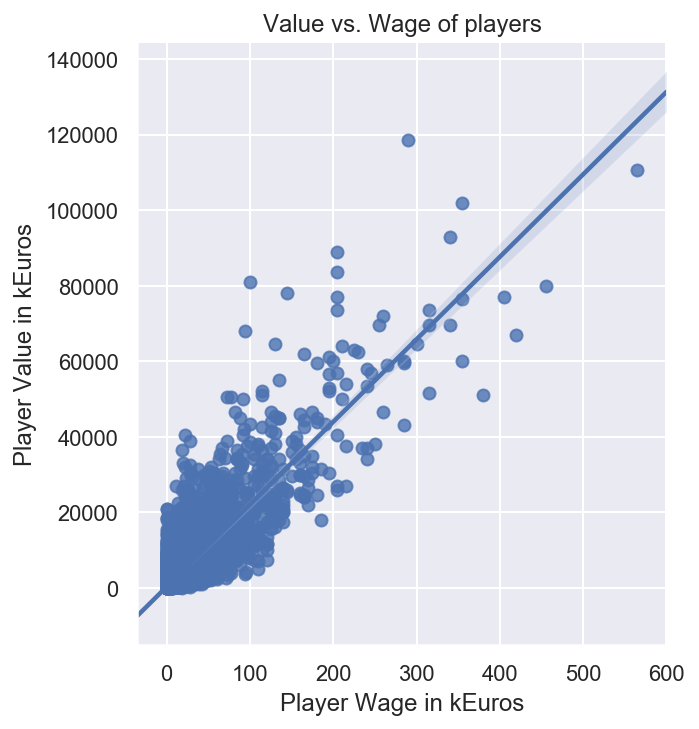

In [116]:
df2 = df.copy()
df2[['Wage', 'Value']] = df2[['Wage', 'Value']]/1000
sns.lmplot('Wage', 'Value', data = df2)
plt.xlabel("Player Wage in kEuros")
plt.ylabel("Player Value in kEuros")
plt.title("Value vs. Wage of players");

> This above plot is showing that the players are not being paid as they are values. However, there is clear trend showing that the higher the value of a player, the higher his wage is.